In [1]:
# show plt.show() in new window
# %matplotlib inline

In [2]:
import cv2
import glob
import time
import math
import io
import PIL

from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# plt.ion()
# matplotlib.interactive(True)
# matplotlib.rcParams['interactive'] == True

In [4]:
# from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'qt')

In [5]:
def resize_img(img, scale_percent):
    # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)  
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  
        
    return resize_img

In [6]:
def rotate_img(img, rotation=0):
    (h, w, d) = img.shape
    center = (w // 2, h // 2)
    
    # 第一個參數旋轉中心，第二個參數旋轉角度(-順時針/+逆時針)，第三個參數縮放比例
    M = cv2.getRotationMatrix2D(center, rotation, 1.0)
    
    # 第三個參數變化後的圖片大小
    rotate_img = cv2.warpAffine(img, M, (w, h))
    
    return rotate_img

In [7]:
def gaussian_noise(img, mean=0, sigma=0.1):
    # int -> float (標準化)
    img = img / 255.0
    # 隨機生成高斯 noise (float + float)
    noise = np.random.normal(mean, sigma, img.shape)
    # noise + 原圖
    gaussian_out = img + noise
    # 所有值必須介於 0~1 之間，超過1 = 1，小於0 = 0
    gaussian_out = np.clip(gaussian_out, 0, 1)
    
    # 原圖: float -> int (0~1 -> 0~255)
    gaussian_out = np.uint8(gaussian_out*255)
    # noise: float -> int (0~1 -> 0~255)
    noise = np.uint8(noise*255)

    return gaussian_out 

In [8]:
def modify_contrast_and_brightness(img, brightness=0 , contrast=0):   

    B = brightness / 255.0
    c = contrast / 255.0 
    k = math.tan((45 + 44 * c) / 180 * math.pi)

    img = (img - 127.5 * (1 - B)) * k + 127.5 * (1 + B)
      
    # 所有值必須介於 0~255 之間，超過255 = 255，小於 0 = 0
    img = np.clip(img, 0, 255).astype(np.uint8)

    return img

In [9]:
def modify_lightness_saturation(img, lightness = 0, saturation = 0):
    # lightness 調整為  "1 +/- 幾 %"
    # saturation 調整為 "1 +/- 幾 %"
    origin_img = img

    # 圖像歸一化，且轉換為浮點型
    fImg = img.astype(np.float32)
    fImg = fImg / 255.0
    
    # 顏色空間轉換 BGR -> HLS
    hlsImg = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
    hlsCopy = np.copy(hlsImg)
 
    # 亮度調整
    hlsCopy[:, :, 1] = (1 + lightness / 100.0) * hlsCopy[:, :, 1]
    hlsCopy[:, :, 1][hlsCopy[:, :, 1] > 1] = 1  # 應該要介於 0~1，計算出來超過1 = 1

    # 飽和度調整
    hlsCopy[:, :, 2] = (1 + saturation / 100.0) * hlsCopy[:, :, 2]
    hlsCopy[:, :, 2][hlsCopy[:, :, 2] > 1] = 1  # 應該要介於 0~1，計算出來超過1 = 1
    
    # 顏色空間反轉換 HLS -> BGR 
    result_img = cv2.cvtColor(hlsCopy, cv2.COLOR_HLS2BGR)
    result_img = ((result_img * 255).astype(np.uint8))

    return result_img
    

In [10]:
def show_histogram(img):    
    fig, ax = plt.subplots()
    # 畫出 RGB 三種顏色的分佈圖
    color = ('b','g','r')
#     plt.ion()
    plt.style.use('dark_background')
    for idx, color in enumerate(color):
        histogram = cv2.calcHist([img],[idx],None,[256],[0, 256])
        ax.plot(histogram, color = color)
#         ax.xlim([0, 256])
        
#     fig.canvas.tostring_rgb()
        
#     plt.savefig("plot_histogram.jpg")
#     plot_histogram = cv2.imread('plot_histogram.jpg')
    
    s, (width, height) = fig.canvas.print_to_buffer()

    # Option 2a: Convert to a NumPy array.
    plot_histogram = np.frombuffer(s, np.uint8).reshape((height, width, 4))
    
#     print(plot_histogram.shape)

    return plot_histogram

In [11]:
# def show_histogram(img):
#     # 畫出 RGB 三種顏色的分佈圖
#     color = ('b','g','r')
# #     plt.ion()
#     plt.style.use('dark_background')
#     for idx, color in enumerate(color):
#         histogram = cv2.calcHist([img],[idx],None,[256],[0, 256])
#         plt.plot(histogram, color = color)
#         plt.xlim([0, 256])
        
# #     fig.canvas.tostring_rgb()
        
# #     plt.savefig("plot_histogram.jpg")
# #     plot_histogram = cv2.imread('plot_histogram.jpg')
    
#     s, (width, height) = plt.canvas.print_to_buffer()

#     # Option 2a: Convert to a NumPy array.
#     plot_histogram = np.frombuffer(s, np.uint8).reshape((height, width, 4))
    
#     print(plot_histogram.shape)
        
        
# #     buf = io.BytesIO()
# #     plt.savefig(buf, format="png")
# #     buf.seek(0)
# #     plot_histogram = cv2.imread(buf)
# #     dataPIL = PIL.Image.open(buf)
# #     plot_histogram = np.asarray(dataPIL)
# #     buf.close()
    
#     return plot_histogram
    

#     fig = plt.figure()
    
#     from StringIO import StringIO
#     import PIL
#     #申请缓冲地址
#     buffer_ = StringIO() #using buffer,great way!
#     #保存在内存中，而不是在本地磁盘，注意这个默认认为你要保存的就是plt中的内容
#     plt.savefig(buffer_,format = 'png')
#     buffer_.seek(0)
#     #用PIL或CV2从内存中读取
#     dataPIL = PIL.Image.open(buffer_)
#     #转换为nparrary，PIL转换就非常快了,data即为所需
#     data = np.asarray(dataPIL)
#     cv2.imshow('image', data)
#     #释放缓存    
#     buffer_.close()


    
    
#     np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    
#     define a function which returns an image as numpy array from figure
#     def get_img_from_fig(fig):
#         buf = io.BytesIO()
#         fig.savefig(buf, format="jpg")
#         buf.seek(0)
#         plot_histogram = cv2.imread(buf)
        
#         img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
#         buf.close()
#         img = cv2.imdecode(img_arr, 1)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         return plot_histogram
    
    

    # you can get a high-resolution image as numpy array!!
#     plot_img_np = get_img_from_fig(fig)
    


    
#     plt.show()

In [12]:
def color_panel():  
    img = np.zeros((300,512,3), np.uint8)
    r = cv2.getTrackbarPos('R','My color panel')
    g = cv2.getTrackbarPos('G','My color panel')
    b = cv2.getTrackbarPos('B','My color panel')
    img[:] = [b,g,r]
    
    cv2.imshow('My color panel', img)
    
    return img


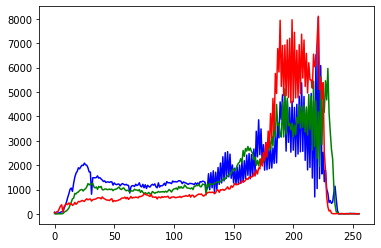

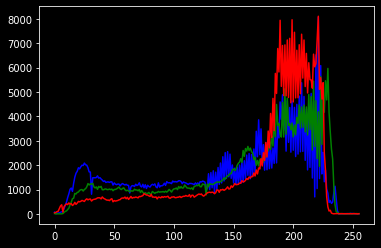

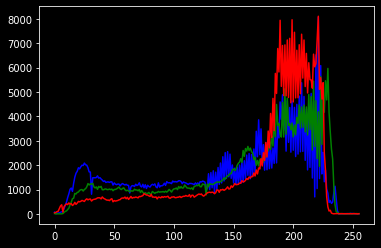

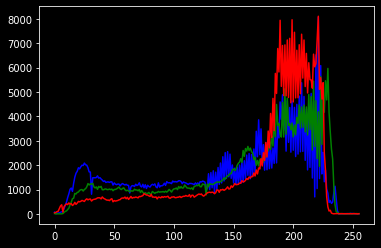

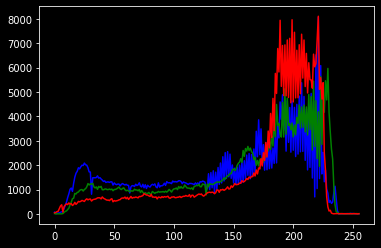

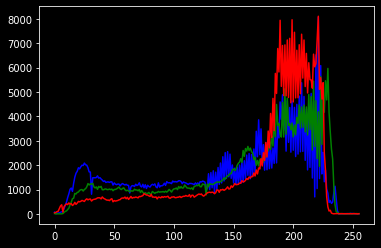

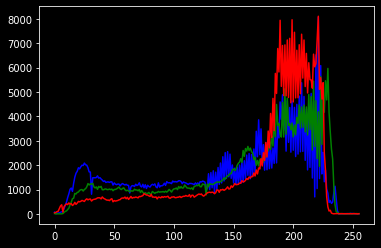

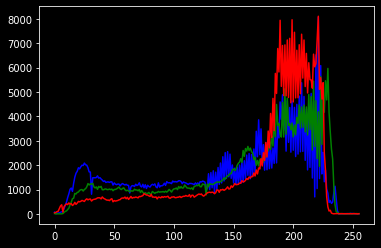

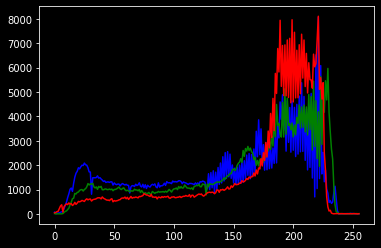

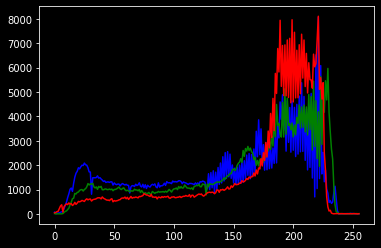

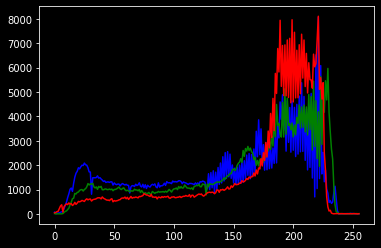

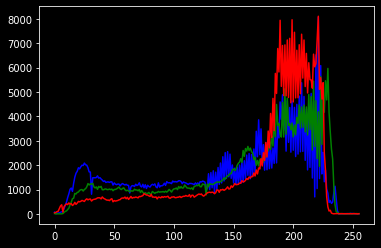

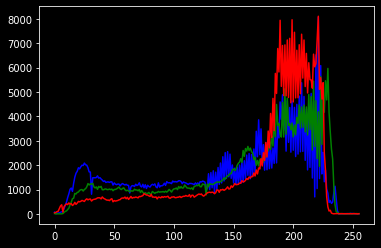

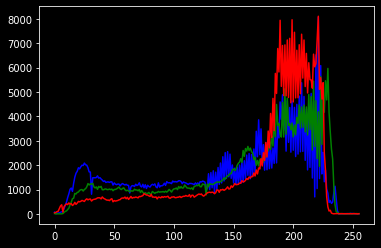

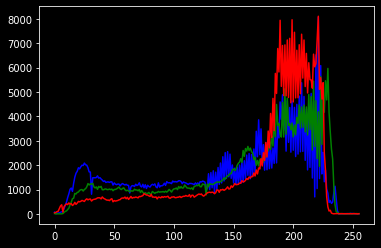

In [13]:
# 讀取彩色圖像
img = cv2.imread('./testdata/cat.jpg', cv2.IMREAD_COLOR)

h, w, dim = img.shape

# control analysis size
if h>=1000 or w>=1000:
    img = resize_img(img, scale_percent=30)
    

half_MAX_VALUE = 100
half_BIG_MAX_VALUE = 255


window_flags = cv2.WINDOW_AUTOSIZE| cv2.WINDOW_KEEPRATIO

# 修圖主視窗
cv2.namedWindow("My photoshop", window_flags) # cv2.WINDOW_NORMAL)

# 直方圖視窗
cv2.namedWindow("My histogram", window_flags) # cv2.WINDOW_NORMAL)

# 控制顏色
cv2.namedWindow("My color panel", window_flags) # cv2.WINDOW_NORMAL)

def nothing(*arg):
    pass


# create trackbars for color change
cv2.createTrackbar('R','My color panel', 0, 255, nothing)
cv2.createTrackbar('G','My color panel', 0, 255, nothing)
cv2.createTrackbar('B','My color panel', 0, 255, nothing)


# 滑動塊
cv2.createTrackbar("rotation", "My photoshop", 180, 2*180, nothing)
cv2.createTrackbar("brightness", "My photoshop", half_MAX_VALUE, 2*half_MAX_VALUE, nothing) # 亮度
cv2.createTrackbar("contrast", "My photoshop", half_BIG_MAX_VALUE, 2*half_BIG_MAX_VALUE, nothing) # 對比
cv2.createTrackbar("lightness", "My photoshop", half_MAX_VALUE, 2*half_MAX_VALUE, nothing) # 亮度
cv2.createTrackbar("saturation", "My photoshop", half_BIG_MAX_VALUE, 2*half_BIG_MAX_VALUE, nothing) # 飽和度
# 陰影
# 色溫
# 銳化

cv2.createTrackbar("noise", "My photoshop", 0, half_MAX_VALUE, nothing) # 顆粒點


# 調整飽和度和亮度
while True:
    time.sleep(0.1) # for better memory use
    
    img_copy = np.copy(img)
    h, w, dim = img_copy.shape
    
    # My color panel
    colorpanel = color_panel()    
    
    rotation = cv2.getTrackbarPos('rotation', 'My photoshop') - 180
    lightness = cv2.getTrackbarPos('lightness', 'My photoshop') - half_MAX_VALUE 
    saturation = cv2.getTrackbarPos('saturation', 'My photoshop') - half_BIG_MAX_VALUE 
    brightness = cv2.getTrackbarPos('brightness', 'My photoshop') - half_MAX_VALUE
    contrast = cv2.getTrackbarPos('contrast', 'My photoshop') - half_BIG_MAX_VALUE 
    noise = cv2.getTrackbarPos('noise', 'My photoshop')
        
    img_copy = rotate_img(img_copy, rotation)
    img_copy = modify_lightness_saturation(img_copy, lightness, saturation)
    img_copy = modify_contrast_and_brightness(img_copy, brightness , contrast)   
    
    img_copy = gaussian_noise(img_copy, mean=0, sigma=noise/100)
    
    
    plot_histogram = show_histogram(img_copy)
    
    # 顯示調整後的效果
    cv2.imshow("My histogram", plot_histogram)
    
    msg = "Press ESC to exit, or press S to save and exit."
    img_copy = cv2.putText(img_copy, msg, (10, h-10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 顯示調整後的效果
    cv2.imshow("My photoshop", img_copy)

    
    ch = cv2.waitKey(5)
    if ch == 27:
        # 按 ESC 鍵退出
        break
    elif ch == ord('s'):
        # 按 s 鍵保存結果並退出
        cv2.imwrite("result.jpg", img_copy)
        break
        

# 關閉所有的窗口
cv2.destroyAllWindows()

# Reference

https://www.itdaan.com/tw/6488189fb5d7d60b163039cd0a004f70

https://blog.csdn.net/jacke121/article/details/54718563

https://blog.csdn.net/aa846555831/article/details/52372884?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

https://web-backend.icare.univ-lille.fr/tutorials/convert_a_matplotlib_figure

https://www.itread01.com/content/1547426526.html

http://www.shengwn.com/page/2018-07-22/how_to_make_a_filter_with_python.htm

https://blog.csdn.net/aa846555831/article/details/52372884

https://www.thetopsites.net/article/58641662.shtml

https://blog.csdn.net/fanjiule/article/details/81606596

https://blog.gtwang.org/programming/opencv-drawing-functions-tutorial/

https://blog.csdn.net/wuyoy520/article/details/47111295




